 # IEEE GHRCEM STUDENT BRANCH

# problem statement - 
Given a dataset containing various patient attributes, the task is to develop a machine learning model that can 
accurately predict the presence of heart disease in patients based on their demographic and clinical information. 
This is a binary classification problem where the model needs to classify patients into two classes: those with heart 
disease (1) and those without (0). The goal is to build a model that can assist healthcare professionals in early 
detection and diagnosis of heart disease, thereby improving patient outcomes and reducing mortality rates.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA)

In [2]:
heart_disease_data=pd.read_csv('heart.csv')

In [3]:
heart_disease_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
heart_disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart_disease_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
heart_disease_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
heart_disease_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
null_counts = heart_disease_data.isnull().sum()

# Print the count of null values for each column
print("Count of null values for each column:")
print(null_counts)

Count of null values for each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# Data Visualization

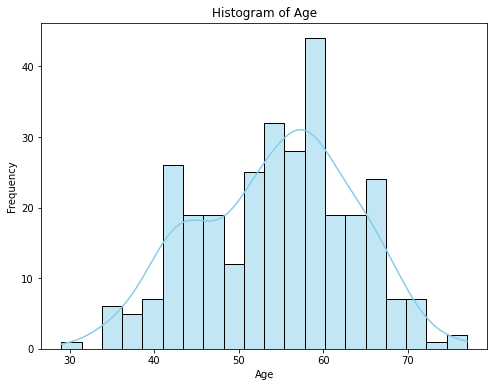

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(heart_disease_data['age'], kde=True, bins=20, color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

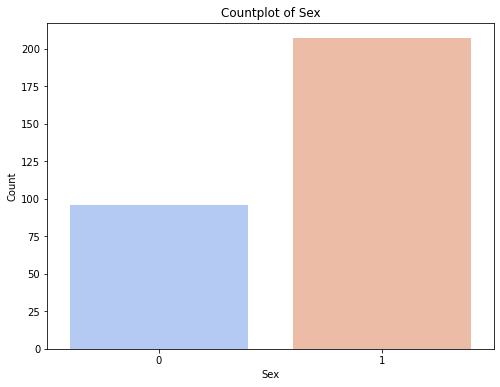

In [11]:
# Countplot for Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=heart_disease_data, palette='coolwarm')
plt.title('Countplot of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

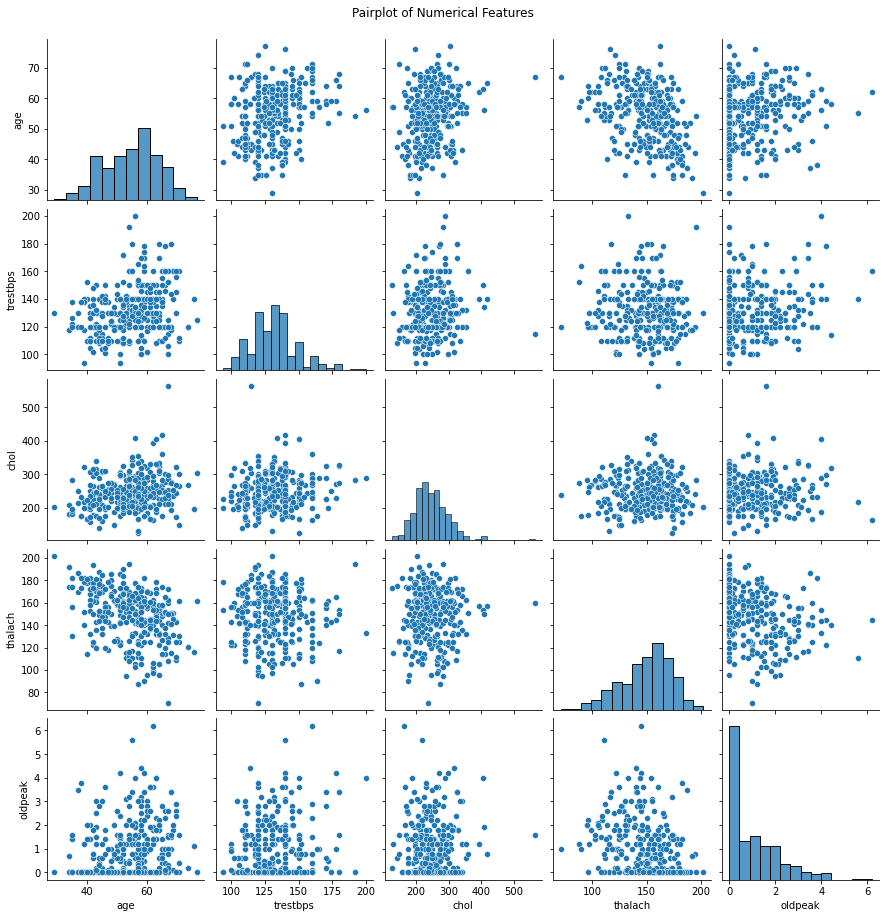

In [12]:
# Pairplot for numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
sns.pairplot(heart_disease_data[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

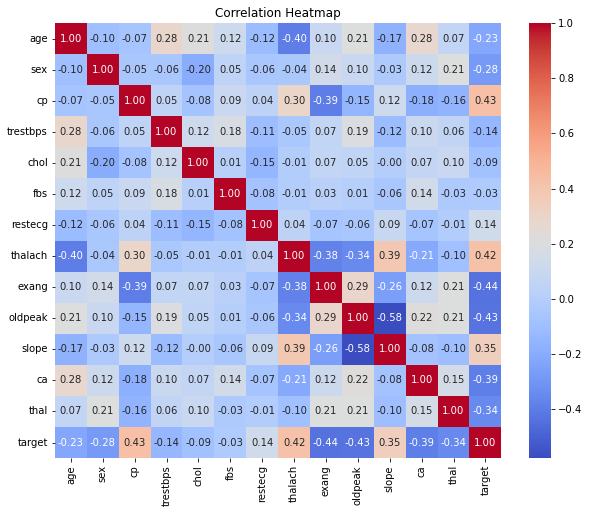

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heart_disease_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

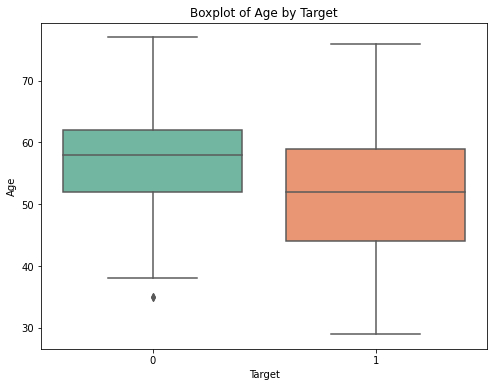

In [14]:
# Boxplot for Age by target class
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='age', data=heart_disease_data, palette='Set2')
plt.title('Boxplot of Age by Target')
plt.xlabel('Target')
plt.ylabel('Age')
plt.show()

# Training and Testing

In [15]:
X=heart_disease_data.loc[:,heart_disease_data.columns!='target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [16]:
y=heart_disease_data.loc[:,"target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [17]:
X_encoded=pd.get_dummies(heart_disease_data,columns=['sex', 'cp','fbs','restecg','exang','slope','ca','thal'])
X_encoded.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [18]:
#splitting thr dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state = 1)

In [19]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [20]:
from sklearn.svm import SVC 
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train,y_train )

SVC(kernel='linear', random_state=0)

In [21]:
#Predict  the test data 
y_pred_svc = svc.predict(X_test)

In [22]:
#checking the performance of the model
y_pred_svc_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_svc })
y_pred_svc_df.head(10)

,Expected,Predicted
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0
295,0,0
269,0,0
119,1,1
193,0,0
154,1,1


In [23]:
y_pred_svc_df.shape

(61, 2)

# Model Evalution

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [25]:
# Creating Confusioin matrix
svc_cm = confusion_matrix(y_test, y_pred_svc)

# Create a pandas DataFrame from the confusion matrix
svc_cm_df = pd.DataFrame(svc_cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Apply background gradient color to the DataFrame
svc_cm_df_styled = svc_cm_df.style.background_gradient(cmap='coolwarm')

print("Confusion Matrix:")
svc_cm_df_styled


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,30,0
Actual Positive,0,31


In [26]:
# Calculate the accuracy score
svc_acc = accuracy_score(y_test, y_pred_svc)
# Printing accuracy 
print("Accuracy: ", svc_acc)

Accuracy:  1.0
